# PyTorch study_first week assignment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

1번 문제 : 사용할 데이터의 수는 1000개, 경사하강법 반복횟수는 10000로 설정하세요

In [2]:
num_data = 1000
num_epoch = 10000

2번 문제 : 노이즈 텐서를 만들어줍니다! 이때, init.normal() 함수를 사용하여 평균은 0 (디폴트), 표준편차는 1로 설정하세요

In [5]:
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)

 3번 문제 : y에다가 noise를 더해서 y_noise 함수를 만들어주세요

In [6]:
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [7]:
x.shape, y_noise.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

-

In [8]:
#  인공 신경망의 깊이가 길어질수록 하나하나 실행하는 것보다 
#  이렇게 묶어서 연산하는 것이 더 편리하기 때문에 nn.Sequential 클래스를 사용
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
    )

4번 문제 : SGD 옵티마이저를 불러오고, 학습률은 0.002로 설정하세요

In [9]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.002)

In [10]:
from tqdm.notebook import tqdm

5번 문제 : 아래 코드에서 #가 있는 곳을 채워 변수별 기울기를 구해주세요

In [11]:
loss_array = []

for i in tqdm(range(num_epoch)):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step() 
    
    loss_array.append(loss)
    
    if i % 500 == 0:
        print(f'Epoch {i}\'s Loss: {loss}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch 0's Loss: 78.32810974121094
Epoch 500's Loss: 20.080888748168945
Epoch 1000's Loss: 8.660113334655762
Epoch 1500's Loss: 8.776693344116211
Epoch 2000's Loss: 7.448720932006836
Epoch 2500's Loss: 6.447078704833984
Epoch 3000's Loss: 6.0079345703125
Epoch 3500's Loss: 5.756638526916504
Epoch 4000's Loss: 5.761113166809082
Epoch 4500's Loss: 5.355306625366211
Epoch 5000's Loss: 5.369778156280518
Epoch 5500's Loss: 5.317958831787109
Epoch 6000's Loss: 5.3312273025512695
Epoch 6500's Loss: 5.228898048400879
Epoch 7000's Loss: 5.151069641113281
Epoch 7500's Loss: 5.169020652770996
Epoch 8000's Loss: 5.033382892608643
Epoch 8500's Loss: 5.169243812561035
Epoch 9000's Loss: 5.127483367919922
Epoch 9500's Loss: 5.072109699249268


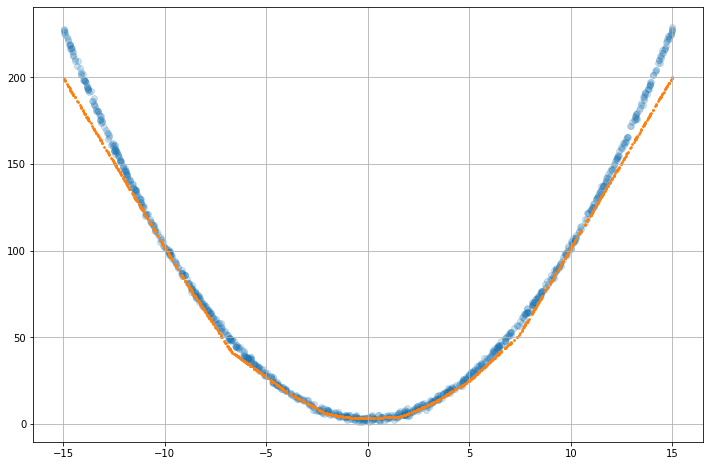

In [12]:
# 파란 점은 노이즈를 추가한 데이터
# 주황색 선은 학습한 모델을 통해 유추한 값
# 중간중간 꺾인 부분은 렐루 활성화 함수의 영향입니다.
plt.figure(figsize=(12,8))
plt.scatter(x,y_noise,alpha=0.2)
plt.scatter(x, model(x).detach().numpy(),s=3)
plt.grid(True)
plt.show()